# Customer Segmentation(Clustering)

  CustomerID  TotalValue  Quantity    AvgPrice  Cluster
0      C0001     3354.52        12  278.334000        2
1      C0002     1862.74        10  208.920000        2
2      C0003     2725.38        14  195.707500        2
3      C0004     5354.88        23  240.636250        1
4      C0005     2034.24         7  291.603333        0
Davies-Bouldin Index: 0.9110946487666844


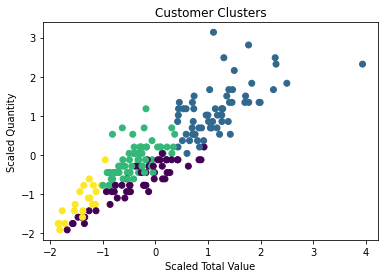

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


url_customer = "https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
url_product = "https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
url_transaction = "https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(url_customer)
products = pd.read_csv(url_product)
transactions = pd.read_csv(url_transaction)
data["AvgPrice"] = data[["Price_x", "Price_y"]].mean(axis=1)
features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "AvgPrice": "mean"
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.iloc[:, 1:])


kmeans = KMeans(n_clusters=4, random_state=42)
features["Cluster"] = kmeans.fit_predict(scaled_features)
print(features.head())

db_index = davies_bouldin_score(scaled_features, features["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=features["Cluster"], cmap="viridis")
plt.title("Customer Clusters")
plt.xlabel("Scaled Total Value")
plt.ylabel("Scaled Quantity")
plt.show()
